In [1]:
"""Created on Sun Jan  3 10:50:02 2021

@author: Mateo
"""

import matplotlib.pyplot as plt
import numpy as np

from HARK.Calibration.Income.IncomeTools import (
    Cagetti_income,
    CGM_income,
    find_profile,
    parse_income_spec,
)

# What year to use as the base monetary year?
# (pick 1992 as it is used by both of the papers we are comparing)
adjust_infl_to = 1992

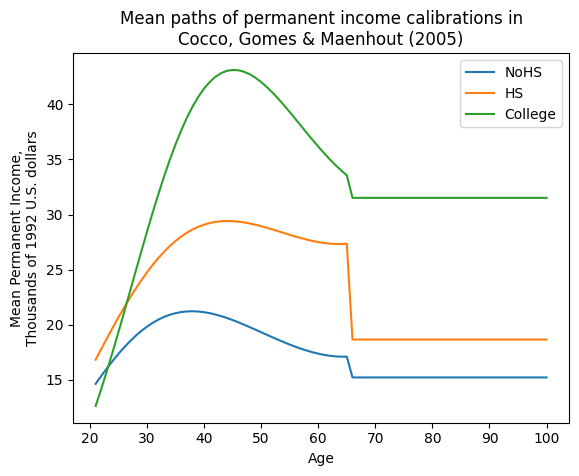

In [2]:
age_min = 21
age_max = 100

ages = np.arange(age_min, age_max + 1)

plt.figure()
for spec in CGM_income.items():
    label = spec[0]

    params = parse_income_spec(
        age_min=age_min,
        age_max=age_max,
        adjust_infl_to=adjust_infl_to,
        **spec[1],
    )
    MeanY = find_profile(params["PermGroFac"], params["P0"])

    plt.plot(ages, MeanY, label=label)

plt.title(
    "Mean paths of permanent income calibrations in\n"
    + "Cocco, Gomes & Maenhout (2005)",
)
plt.xlabel("Age")
plt.ylabel(
    "Mean Permanent Income,\n" + f"Thousands of {adjust_infl_to} U.S. dollars",
)
plt.legend()
plt.show()

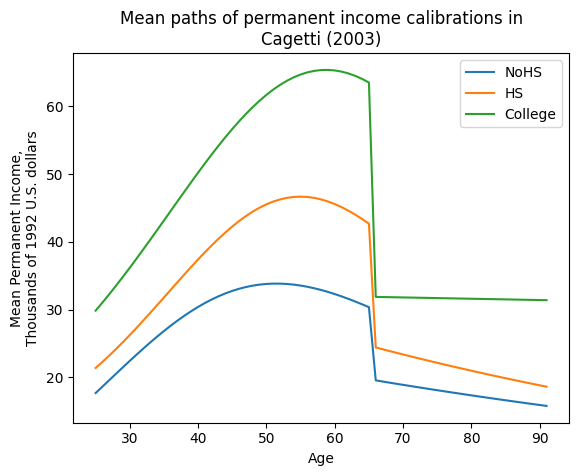

In [3]:
age_min = 25
age_max = 91
# Cagetti has a year trend in his specification, so we have to say on what
# year agents enter the model.
start_year = 1980

ages = np.arange(age_min, age_max + 1)

plt.figure()
for spec in Cagetti_income.items():
    label = spec[0]

    params = parse_income_spec(
        age_min=age_min,
        age_max=age_max,
        adjust_infl_to=adjust_infl_to,
        start_year=start_year,
        **spec[1],
    )
    MeanY = find_profile(params["PermGroFac"], params["P0"])

    plt.plot(ages, MeanY, label=label)

plt.title("Mean paths of permanent income calibrations in\n" + "Cagetti (2003)")
plt.xlabel("Age")
plt.ylabel(
    "Mean Permanent Income,\n" + f"Thousands of {adjust_infl_to} U.S. dollars",
)
plt.legend()
plt.show()